In [1]:
import os
import requests
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.nn import functional as F

In [2]:
!pip install --upgrade -q accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 18.0 MB/s eta 0:00:00


In [3]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-mmpew3m0
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-mmpew3m0
  Resolved https://github.com/huggingface/transformers.git to commit 7547f55e5d93245c0a013b50df976924f2d9e8b0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.49.0.dev0-py3-none-any.whl size=10589076 sha256=fefaa1580ca70ef9f5ef2f0cfc3e769dde2705ea2c7b26687fded64adb1c067c
  Stored in directory: /tmp/pip-ephem-wheel-cache-6y_8c21m/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.0
    Uninstalling transformers-4.47.0:
      Successfully uninstalled transformers-4.47.0


In [4]:
# read image data
image_path = "/kaggle/input/mini-coco2014-dataset-for-image-captioning/Images/"
image_files = os.listdir(image_path)
print(len(image_files), image_files[0])

18783 COCO_train2014_000000487632.jpg


In [5]:
def get_one_image(idx=-1,image_files=image_files, image_path="/kaggle/input/mini-coco2014-dataset-for-image-captioning/Images/"):
    data_size = len(image_files)
    if idx < 0 or idx >= data_size:
        idx = random.randint(1, data_size)-1
    print(f"choose index {idx} from total {data_size} images")
    img_path = image_path + image_files[idx]
    print(img_path)
    return img_path

choose index 10326 from total 18783 images
/kaggle/input/mini-coco2014-dataset-for-image-captioning/Images/COCO_train2014_000000429946.jpg


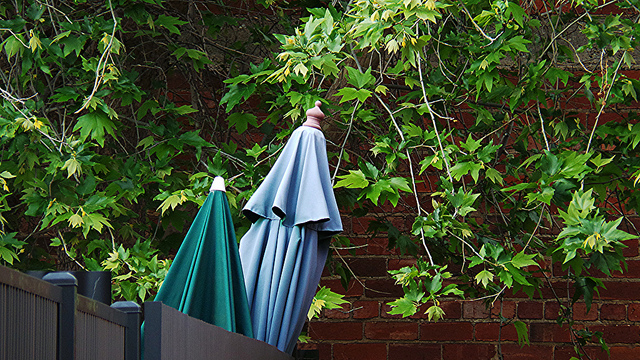

In [6]:
img = get_one_image()
image = Image.open(img)
display(image)

In [7]:
from transformers import AutoProcessor, LlavaForConditionalGeneration
from transformers import BitsAndBytesConfig
import torch

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)


model_id = "llava-hf/llava-1.5-7b-hf"

processor = AutoProcessor.from_pretrained(model_id)
tokenizer = processor.tokenizer
model = LlavaForConditionalGeneration.from_pretrained(model_id, quantization_config=quantization_config, device_map="auto")

processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [8]:
print(model)

LlavaForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPSdpaAttention(
              (k_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (a

In [9]:
print(model.config)

LlavaConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "llava-hf/llava-1.5-7b-hf",
  "architectures": [
    "LlavaForConditionalGeneration"
  ],
  "ignore_index": -100,
  "image_seq_length": 576,
  "image_token_index": 32000,
  "model_type": "llava",
  "multimodal_projector_bias": true,
  "pad_token_id": 32001,
  "projector_hidden_act": "gelu",
  "quantization_config": {
    "_load_in_4bit": true,
    "_load_in_8bit": false,
    "bnb_4bit_compute_dtype": "float16",
    "bnb_4bit_quant_storage": "uint8",
    "bnb_4bit_quant_type": "fp4",
    "bnb_4bit_use_double_quant": false,
    "llm_int8_enable_fp32_cpu_offload": false,
    "llm_int8_has_fp16_weight": false,
    "llm_int8_skip_modules": null,
    "llm_int8_threshold": 6.0,
    "load_in_4bit": true,
    "load_in_8bit": false,
    "quant_method": "bitsandbytes"
  },
  "text_config": {
    "_name_or_path": "lmsys/vicuna-7b-v1.5",
    "architectures": [
      "LlamaForCausalLM"
    ],
    "max_position_embeddings": 4096

In [10]:
print(type(model))

print(type(model.vision_tower.vision_model.encoder.layers))
print(model.vision_tower.vision_model.encoder.layers)

print("################################")
print(len(model.vision_tower.vision_model.encoder.layers))
print(model.vision_tower.vision_model.encoder.layers[0])

print("################################")
print(model.vision_tower.vision_model.encoder.layers[0].self_attn)

print("################################")
print(model.vision_tower.vision_model.encoder.layers[0].self_attn.k_proj)
print(type(model.vision_tower.vision_model.encoder.layers[0].self_attn.k_proj))

<class 'transformers.models.llava.modeling_llava.LlavaForConditionalGeneration'>
<class 'torch.nn.modules.container.ModuleList'>
ModuleList(
  (0-23): 24 x CLIPEncoderLayer(
    (self_attn): CLIPSdpaAttention(
      (k_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
      (v_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
      (q_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
      (out_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
    )
    (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (mlp): CLIPMLP(
      (activation_fn): QuickGELUActivation()
      (fc1): Linear4bit(in_features=1024, out_features=4096, bias=True)
      (fc2): Linear4bit(in_features=4096, out_features=1024, bias=True)
    )
    (layer_norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
)
################################
24
CLIPEncoderLayer(
  (self_attn): CLIPSdpaAttention(
    (k_proj): Linear4bit(

In [11]:
generate_config = {
    "max_new_tokens": 50,
    # "num_beams": 3,
    # "early_stopping": True,
    "do_sample": False,
    # "top_p": 0.3,
    "return_dict_in_generate": True,
    "output_attentions": True,
    "output_hidden_states": True,
     
}
print(generate_config)

{'max_new_tokens': 50, 'do_sample': False, 'return_dict_in_generate': True, 'output_attentions': True, 'output_hidden_states': True}


In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"

prompt = "USER: <image>\nWhat's the content of the image? ASSISTANT:"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)

input_kwags = {**inputs, **generate_config}

output = model.generate(**input_kwags)


`torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to eager attention. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [13]:
print(processor.batch_decode(output["sequences"], skip_special_tokens=True, clean_up_tokenization_spaces=False))

["USER:  \nWhat's the content of the image? ASSISTANT: The image features a patio umbrella, which is open and placed on a table. The umbrella is blue and has a green top."]


In [14]:
## num_layers: 32
## num_heads: 32
## data structure is [tokens, layers, batch_size, num_head, input_size, input_size]

print(type(output["attentions"]), len(output["attentions"]))
print(type(output["attentions"][0]), len(output["attentions"][0]))
print(output["attentions"][0][0].shape)

<class 'tuple'> 32
<class 'tuple'> 32
torch.Size([1, 32, 597, 597])


In [15]:
## data structure is [tokens, layers, batch_size, input_size, output_size]

print(type(output["hidden_states"]), len(output["hidden_states"]))
print(type(output["hidden_states"][0]), len(output["hidden_states"][0]))
print(output["hidden_states"][0][0].shape)

<class 'tuple'> 32
<class 'tuple'> 33
torch.Size([1, 597, 4096])


In [16]:
print(output["attentions"][0][0][0][0].shape)
print(output["attentions"][0][0][0][0].sum(dim=1))

torch.Size([597, 597])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1

In [17]:
generate_config = {
    "max_new_tokens": 50,
    # "num_beams": 3,
    # "early_stopping": True,
    "do_sample": False,
    # "top_p": 0.3,
    "return_dict_in_generate": True,
    "output_attentions": True,
    "output_hidden_states": True,
}

def get_output(image):
    prompt = "USER: <image>\nWhat's the content of the image? ASSISTANT: "
    inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)
    input_kwags = {**inputs, **generate_config}
    outputs = model.generate(**input_kwags)
    return inputs, outputs

def get_attention_scores(outputs, token_idx):
    ## [new_tokens, layers, batch_size, num_head, input_size, input_size]
    
    atten_weight = []
    for layer in outputs["attentions"][token_idx]:
        layer_attns = layer.squeeze(0)
        atten_weight.append(layer_attns[:, -1, :].cpu())
        
    return torch.stack(atten_weight)


In [18]:
inputs, outputs = get_output(image)

atten_weight = get_attention_scores(outputs, -1)
print(atten_weight.shape)

torch.Size([32, 32, 647])


In [19]:
def evaluate(inputs, outputs, atten_weight):
    image_token_id = 32000
    image_token_num = 576
    input_ids = inputs["input_ids"].cpu()
    output_ids = outputs["sequences"].cpu()
    print(input_ids.shape)
    print(processor.batch_decode(outputs["sequences"], skip_special_tokens=True, clean_up_tokenization_spaces=False))

    prompt_length = input_ids.shape[1]
    output_length = output_ids.shape[1]
    print(prompt_length, output_length)

    output_ids_list = output_ids.squeeze().tolist()
    img_token_first_idx = output_ids_list.index(image_token_id)

    modified_output_token_ids = output_ids_list[0:img_token_first_idx] + [image_token_id] + output_ids_list[img_token_first_idx+image_token_num:]
    
    decode_tokens = tokenizer.convert_ids_to_tokens(modified_output_token_ids)
    print(decode_tokens)

    total_attention = atten_weight[-1].mean(dim=0)
    print(total_attention.shape)
    print(torch.sum(total_attention[img_token_first_idx:img_token_first_idx+image_token_num]))
    modified_attention = torch.cat([
        total_attention[0:img_token_first_idx],
        torch.sum(total_attention[img_token_first_idx:img_token_first_idx+image_token_num], dim=0, keepdim=True),
        total_attention[img_token_first_idx+image_token_num:]
    ]).tolist()

    print(modified_attention)

    fig1, ax1 = plt.subplots(1, figsize=(20, 5))
    plot_decode_tokens = decode_tokens[:len(modified_attention)]
    ax1.tick_params(axis='x', labelsize=16)
    ax1.tick_params(axis='y', labelsize=16)
    ax1.plot(modified_attention, linewidth=3)
    ax1.set_xticks(range(len(plot_decode_tokens)))
    ax1.set_xticklabels(plot_decode_tokens, rotation=75)
    ax1.set_title("Sum vision tokens", fontsize=20);
    


    



torch.Size([647])
torch.Size([1, 598])
["USER:  \nWhat's the content of the image? ASSISTANT:  The image features a patio set with a blue umbrella and a green umbrella. The umbrellas are placed on a table, and there is a chair nearby. The scene also includes a brick wall and a vine-"]
598 648
['<s>', '▁US', 'ER', ':', '▁', '<image>', '▁', '<0x0A>', 'What', "'", 's', '▁the', '▁content', '▁of', '▁the', '▁image', '?', '▁A', 'SS', 'IST', 'ANT', ':', '▁', '▁The', '▁image', '▁features', '▁a', '▁pat', 'io', '▁set', '▁with', '▁a', '▁blue', '▁um', 'bre', 'lla', '▁and', '▁a', '▁green', '▁um', 'bre', 'lla', '.', '▁The', '▁um', 'bre', 'll', 'as', '▁are', '▁placed', '▁on', '▁a', '▁table', ',', '▁and', '▁there', '▁is', '▁a', '▁chair', '▁nearby', '.', '▁The', '▁scene', '▁also', '▁includes', '▁a', '▁brick', '▁wall', '▁and', '▁a', '▁v', 'ine', '-']
torch.Size([647])
tensor(0.1178, dtype=torch.float16)
[0.47265625, 0.0013074874877929688, 0.0002665519714355469, 0.00010156631469726562, 0.00024867057800292

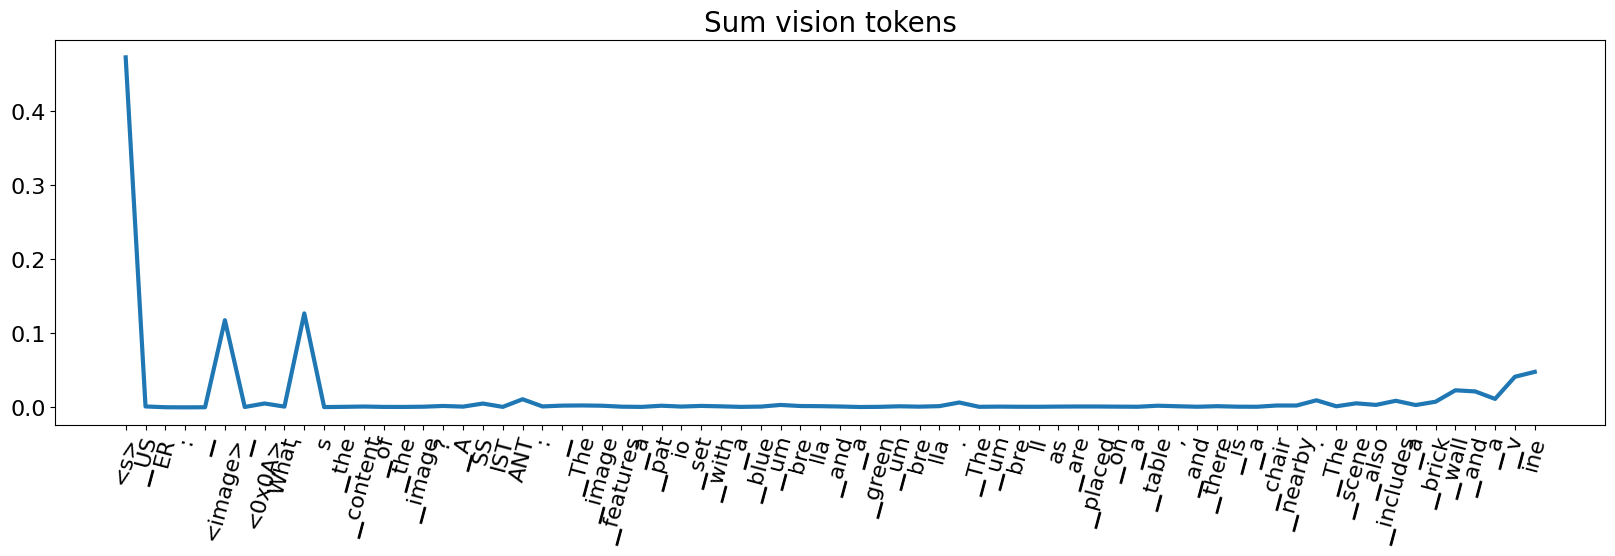

In [20]:
## last layer average
last_layer_average = atten_weight[-1,:,:].mean(dim=0)
print(last_layer_average.shape)

evaluate(inputs, outputs, atten_weight)

In [21]:
## [tokens, layers, batch_size, num_head, input_size, input_size]

print(inputs["input_ids"].shape)
print(outputs["sequences"].shape)
print(outputs["attentions"][0][0].shape)
print(processor.batch_decode(outputs["sequences"], skip_special_tokens=True, clean_up_tokenization_spaces=False))

torch.Size([1, 598])
torch.Size([1, 648])
torch.Size([1, 32, 598, 598])
["USER:  \nWhat's the content of the image? ASSISTANT:  The image features a patio set with a blue umbrella and a green umbrella. The umbrellas are placed on a table, and there is a chair nearby. The scene also includes a brick wall and a vine-"]
